# Inicialização da plataforma

## Bibliotecas



```numpy``` -- usada para processamento numérico.

```pandas``` -- usada para manipulação de bases de dados.

```pyplot``` -- para visualização de dados.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Base de dados do Titanic

Essa base de dados pode ser obtida no Kaggle, no endereço:
[www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)

### DESCRIÇÃO DOS ATRIBUTOS:


*   ```survival``` --  Sobrevivente (0 = Não; 1 = Sim)
*   ```pclass``` --  Classe do passageiro (1 = 1a classe; 2 = 2a classe; 3 = 3a classe)
*   ```name``` --  Nome (str)
*   ```sex``` --  Sexo (male; female)
*   ```age``` --  Idade (numérica)
*   ```sibsp``` --  Número de irmãos/conjuges à bordo
*   ```parch``` --  Número de pais/filhos à bordo
*   ```ticket``` --  Número da passagem
*   ```fare``` --  Tarifa do passageiro
*   ```cabin``` --  Cabine
*   ```embarked``` --  Porto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)

### UPLOAD DE ARQUIVO LOCAL:

Para fazer o upload de bases de dados, deve-se usar o objeto ```files``` do pacote ```goggle.colab```.

Deve-se fazer o upload do arquivo "train.csv" disponível na pasta "Datasets\Titanic".

```Se você quiser um botão pra fazer upload do arquivo direto no notebook
#  from google.colab import files
#  uploaded = files.upload()
#  titanic_train = pd.read_csv(next(iter(uploaded.keys())))
```



In [ ]:
download_url = 'Download arquivo'
url_drive_file = 'URL drive do arquivo'

download_path = download_url + url_drive_file.split('/')[-2]

# Leitura de CSV Zipado via URL :)
titanic_train = pd.read_csv(download_path,
                 compression='zip',
                 header=0,
                 sep=',',
                 quotechar='"')

titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_train.shape # linhas, colunas

(891, 12)

In [ ]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Variáveis categóricas ou strings são lidas como `object`

### ESTATÍSTICA DESCRITIVA DOS DADOS

O comando describe exibe prioritariamente os campos numéricos. Deve-se isolar os campos categóricos para serem exibidos posteriormente.

In [ ]:
# Exibe apenas os campos numméricos:

titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Para se ter uma visão dos atributos categóricos, os atributos não numéricos são descartados.

titanic_train.select_dtypes(include='object').describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### REMOÇÃO DE ATRIBUTOS IRRELEVANTES

Os atributos ```survival``` (objetivo/label/classe), e atributos que descrevem os passageiros ou os agrupam em categorias são úteis e serão mantidos, por exemplo: ```Pclass```, ```Sex```, ```Age```, ```SibSp```, ```Parch```, ```Fare``` e ```Embarked```.


* ```passengerId``` é apenas uma chave primária para identificar um passageiro e não é relevante para o problema.

* ```Name``` náo é útil para previsão, mas pode ser útil para identificação dos registros ou pós-processamento (por exemplo, extrair o último nome).

* ```Ticket``` não identifica o registro e nem descreve o passageiro, por isso, deve ser removido.

* ```Cabin``` não identifica bem os passageiros, mas pode ser útil utilizarmos o padrão letra+numero para descrever os passageiros pelo andar do local da cabine.

In [ ]:
del titanic_train["PassengerId"]
del titanic_train["Ticket"]

# Verificando que o número de atributos (colunas) reduziu para 10.

titanic_train.shape

(891, 10)

### TRANSFORMAÇÃO DE VARIÁVEIS

#### Converter numérico em categórico.

Variáveis categóricas codificadas numericamente possuem baixa **LEGIBILIDADE**. Portanto, podem ser candidatas a serem recodificadas.

In [ ]:
titanic_train["Survived"].unique(), titanic_train["Pclass"].unique()

(array([0, 1]), array([3, 1, 2]))

In [ ]:
# OBSERVAÇÃO: se a base for usada para a competição do kaggle, o atributo
# alvo, que é o campo 'survived' NÃO deve ser modificada.

new_survived = pd.Categorical(titanic_train["Survived"], ordered=True)
titanic_train["Survived"] = new_survived.rename_categories(["Morreu","Sobreviveu"])

new_Pclass = pd.Categorical(titanic_train["Pclass"], ordered=True)
titanic_train["Pclass"] = new_Pclass.rename_categories(["1aClasse","2aClasse","3aClasse"])

titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Fare      891 non-null    float64 
 8   Cabin     204 non-null    object  
 9   Embarked  889 non-null    object  
dtypes: category(2), float64(2), int64(2), object(4)
memory usage: 57.8+ KB


In [ ]:
titanic_train.select_dtypes(include='category').describe()

,Survived,Pclass
count,891,891
unique,2,3
top,Morreu,3aClasse
freq,549,491


In [ ]:
titanic_train.groupby(["Pclass","Survived"]).size().reset_index(name="Quantidade")

,Pclass,Survived,Quantidade
0,1aClasse,Morreu,80
1,1aClasse,Sobreviveu,136
2,2aClasse,Morreu,97
3,2aClasse,Sobreviveu,87
4,3aClasse,Morreu,372
5,3aClasse,Sobreviveu,119


#### Converter atributo através de processamento de string (usando *list comprehension*-> [item for item in list] ).

No atributo ```Cabin```,  parece que o padrão letra+número indica que uma cabine pertence a algum andar, ou nível. Podemos agrupar o atributo Cabin pela letra inicial da cabine.


In [ ]:
# Exibe valores únicos
print("\nValores únicos do atributo Cabin:",titanic_train["Cabin"].unique(), sep='\n')


Valores únicos do atributo Cabin:
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


In [ ]:
# Converte o dado para String

char_cabin = titanic_train["Cabin"].astype(str)
char_cabin

0       nan
1       C85
2       nan
3      C123
4       nan
       ... 
886     nan
887     B42
888     nan
889    C148
890     nan
Name: Cabin, Length: 891, dtype: object

In [ ]:
# selecionar apenas o primeiro caractere da coluna

[cabin[0] for cabin in char_cabin][:15]

['n', 'C', 'n', 'C', 'n', 'n', 'E', 'n', 'n', 'n', 'G', 'C', 'n', 'n', 'n']

In [ ]:
titanic_train["Cabin"].str[0]

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

In [ ]:
# Seleciona apenas a primeira letra

new_cabin = pd.Categorical([cabin[0] for cabin in char_cabin])
titanic_train["Cabin"] = new_cabin

print("\nValores únicos do atributo Cabin:",titanic_train["Cabin"].unique(), sep='\n')


Valores únicos do atributo Cabin:
['n', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T']
Categories (9, object): ['A', 'B', 'C', 'D', ..., 'F', 'G', 'T', 'n']


In [ ]:
# .isna()
# .isnull()

# .fillna("n")

### VALORES OMISSOS OU INCONSISTENTES

Em atributos numéricos , as possibilidades são:

1. substituir por zeros;
2. substituir por um valor médio ou mediano;
3. estimar valores usando modelos estatísticos ou preditivos;
4. particionar a base em registros completos e registros incompletos.

Vamos analisar o atributo ```Age``` para tratarmos os valores omissos.

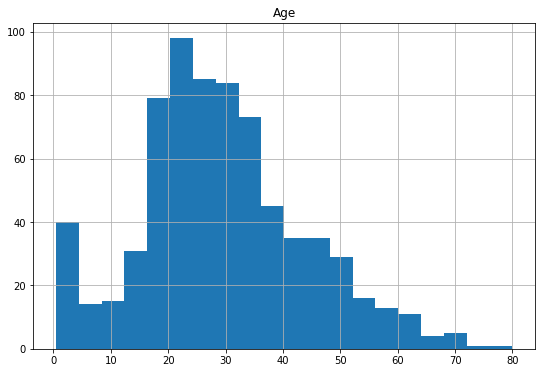

In [ ]:
titanic_train.hist(column='Age',    # Coluna a ser plotada
                   figsize=(9,6),   # Tamanho do gráfico
                   bins=20);        # Numero de colunas/bins do histograma

O dado possui uma distribuição próxima da distribuição Normal. Vamos usar a mediana para preencher os valores faltantes.

In [ ]:
# note que temos um nan

[el for el in titanic_train["Age"]][:10]

[22.0, 38.0, 26.0, 35.0, 35.0, nan, 54.0, 2.0, 27.0, 14.0]

In [ ]:
# note como podemos eliminar o nan

[el for el in titanic_train["Age"] if (np.isnan(el) == False)][:10]

[22.0, 38.0, 26.0, 35.0, 35.0, 54.0, 2.0, 27.0, 14.0, 4.0]

In [ ]:
# utilizamos então a lista sem nans para cálculo da mediana

mediana = np.median([el for el in titanic_train["Age"] if (np.isnan(el) == False)])
mediana

28.0

In [ ]:
# substituimos nans pela mediana

new_age = np.where(titanic_train["Age"].isnull(), # condição
                   mediana,                       # valor se verdadeiro
                   titanic_train["Age"])          # valor se falso

titanic_train["Age"] = new_age


Análise do novo atributo Age:
count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f53589f6690>]],
      dtype=object)

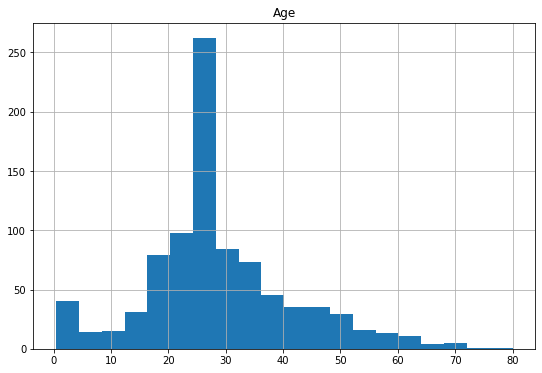

In [ ]:
print("\nAnálise do novo atributo Age:")
print(titanic_train["Age"].describe())

titanic_train.hist(column='Age',    # Coluna a ser plotada
                   figsize=(9,6),   # Tamanho do gráfico
                   bins=20)         # Numero de colunas do histogram

In [ ]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       891 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Fare      891 non-null    float64 
 8   Cabin     891 non-null    category
 9   Embarked  889 non-null    object  
dtypes: category(3), float64(2), int64(2), object(3)
memory usage: 52.1+ KB


### DETECTANDO OUTLIERS

Outliers são valores extremos. A estatística descritiva, em geral, provê um bom indicativo da presença de outliers, com valores máximos e mínimo muito distantes; o valor da média muito próximo de um máximo ou mínimo, mostrando problema de distribuição dos dados.

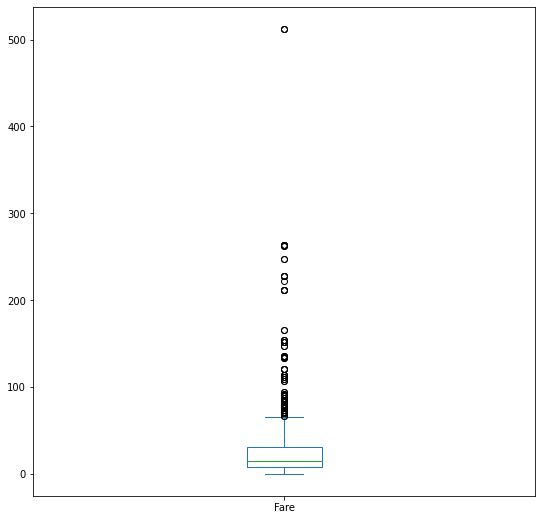

In [ ]:
titanic_train["Fare"].plot(kind="box", figsize=(9,9));

In [ ]:
print("Registros com valores extremos:")
titanic_train[titanic_train["Fare"] == max(titanic_train["Fare"])]

Registros com valores extremos:


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
258,Sobreviveu,1aClasse,"Ward, Miss. Anna",female,35.0,0,0,512.3292,n,C
679,Sobreviveu,1aClasse,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,B,C
737,Sobreviveu,1aClasse,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,B,C


In [ ]:
titanic_train[titanic_train["Fare"] < max(titanic_train["Fare"])].Fare.max()

263.0

In [ ]:
df_novo = titanic_train[titanic_train["Fare"] < max(titanic_train["Fare"])]

df_novo.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,Morreu,3aClasse,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,n,S
1,Sobreviveu,1aClasse,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C
2,Sobreviveu,3aClasse,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,n,S
3,Sobreviveu,1aClasse,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S
4,Morreu,3aClasse,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,n,S


### CRIANDO NOVOS ATRIBUTOS

Vamos criar uma nova variável ```Family```, que irá unir, cônjuge e irmãos (```SibSp```) com pais e filhos (```Parch```).

In [ ]:
titanic_train["Family"] = titanic_train["SibSp"] + titanic_train["Parch"]

titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
0,Morreu,3aClasse,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,n,S,1
1,Sobreviveu,1aClasse,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C,1
2,Sobreviveu,3aClasse,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,n,S,0
3,Sobreviveu,1aClasse,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S,1
4,Morreu,3aClasse,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,n,S,0


In [ ]:
# Encontrando quem tem a maior família a bordo

big_family = np.where(titanic_train["Family"] == max(titanic_train["Family"]))

print("\nAs maiores famílias à bordo:")
titanic_train.loc[big_family]


As maiores famílias à bordo:


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
159,Morreu,3aClasse,"Sage, Master. Thomas Henry",male,28.0,8,2,69.55,n,S,10
180,Morreu,3aClasse,"Sage, Miss. Constance Gladys",female,28.0,8,2,69.55,n,S,10
201,Morreu,3aClasse,"Sage, Mr. Frederick",male,28.0,8,2,69.55,n,S,10
324,Morreu,3aClasse,"Sage, Mr. George John Jr",male,28.0,8,2,69.55,n,S,10
792,Morreu,3aClasse,"Sage, Miss. Stella Anna",female,28.0,8,2,69.55,n,S,10
846,Morreu,3aClasse,"Sage, Mr. Douglas Bullen",male,28.0,8,2,69.55,n,S,10
863,Morreu,3aClasse,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,69.55,n,S,10


 Os atributos agora estão redundantes, ou muito correlacionados, como podemos ver com a matriz de correlação. A matriz só funciona com tipos de dados numéricos. Será possível perceber que a variável ```Family``` terá forte correlação (acima de 0.75) com ```SibSp``` e ```Parch```.

In [ ]:
# A mesma coisa do código abaixo, porém de uma maneira diferente de implementar

  # int_fields = titanic_train.dtypes[titanic_train.dtypes == "int64"].index
  # corr = np.corrcoef(titanic_train[int_fields].transpose())
  # correlacao = pd.DataFrame(data=corr, index=int_fields, columns=int_fields)
  # print("\nMatriz de correlação dos atributos inteiros:\n{0}".format(correlacao))

print("Matriz de correlação dos atributos inteiros")
titanic_train.select_dtypes(include='int').corr()

Matriz de correlação dos atributos inteiros


,SibSp,Parch,Family
SibSp,1.000000,0.414838,0.890712
Parch,0.414838,1.000000,0.783111
Family,0.890712,0.783111,1.000000
